# Country Clustering

## Problem Statement

1. We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country.
2. We then need to suggest the countries which the CEO could focus on the most.

## Data Analysis for the Solution

In [ ]:
# importing initial libraries

import numpy as np
import pandas as pd


In [ ]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the csv file and storing the information in the variable 'df'

df = pd.read_csv('Country-data.csv')

In [ ]:
# getting the first look of the dataframe

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# checking the shape of the dataframe 'df'

df.shape

(167, 10)

### 1. Exploratory Data Analysis

#### Chekcking missing values

In [ ]:
round (df.isnull().sum()/len(df.index)*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Observation : We do not have any missing values in the coloumns

### 1A. Graphical Univariate Analysis

In [ ]:
# importing library for visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating a tuple that consists of a list of all the columns except 'country' in the dataframe 'df'

feature = df.columns[1:]


In [ ]:
# just keeing this her for better understanding - remove later

for i in enumerate (feature):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


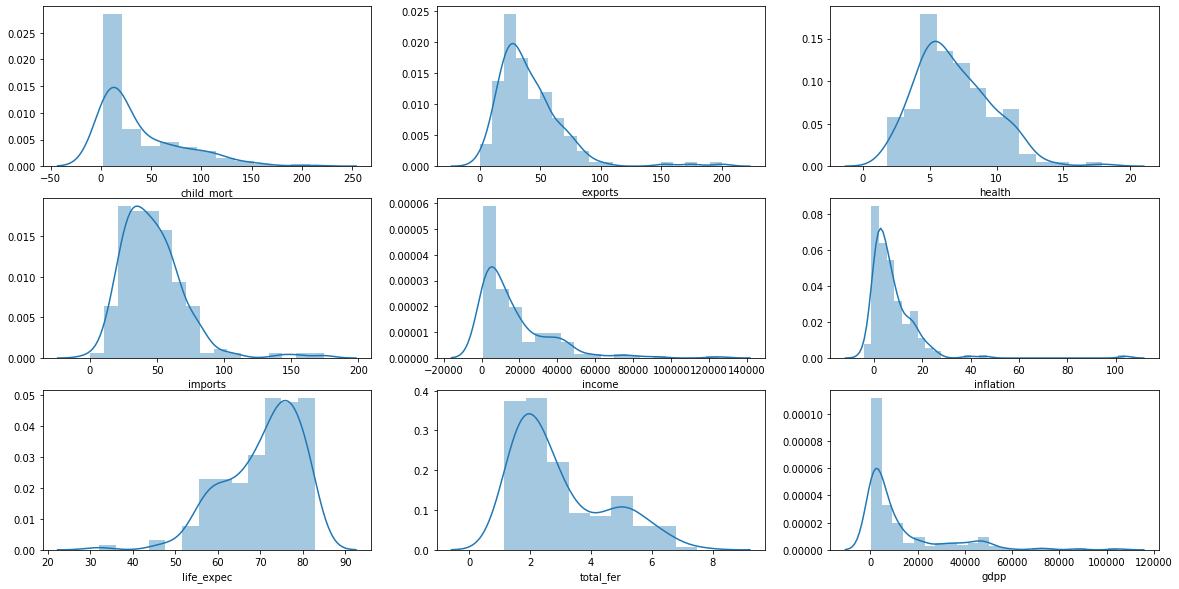

In [ ]:
plt.figure(figsize=(20,10))

# adding number to each feature of the list 'feature' to make use of subplot funcionality using enumerate
# plotting all the variables together to have the idea of how the values in each variables are distributed

for i in enumerate (feature):

    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

plt.show()

#### Initial Observations

* The variables 'life_expec', 'total_fer', 'gdpp','income' and 'child_mort' seem to have more predictive power than the other variables based on the shape of the graph and the variance in data we can observe

### 1B. Graphical Bivariate Analysis

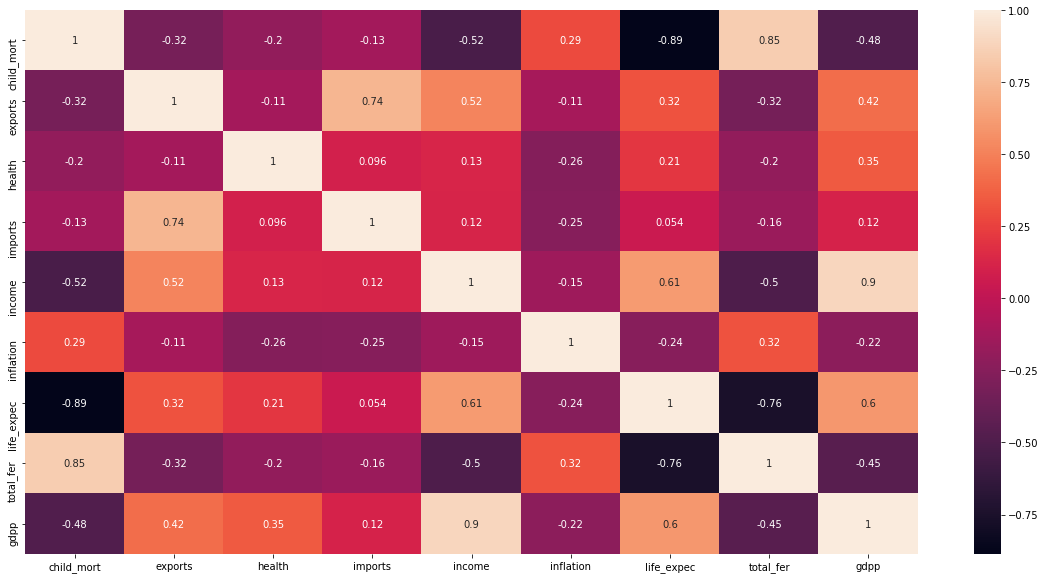

In [ ]:
S

#### Observations

* 'child_mort' is highly correlated with 'life_expec'
* 'total_fer' is also highly correlated with 'child_mort'
*  We can just use 'child_mort' and not loose a significant predictive power of 'life_expec' and 'total_fer'
*  The selection will make clustering easier

#### Final Variables

* Based on the observations from univariate and bivariate analysis, we are selecting the follwing varaibles:
       1. 'child_mort'
       2. 'income'
       3. 'gdpp'

### 1C. Numeric Univarite Analysis and Outlier Treatment

#### Variable One : chid_mort

In [ ]:
# 'child_mort' expresses the death of children under the age of 5 per 1000 live births in a specific country

In [ ]:
df.child_mort.describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

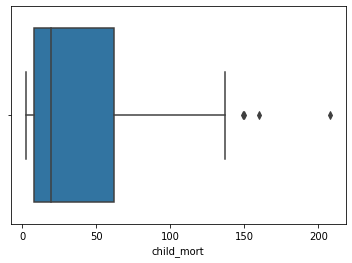

In [ ]:
# plotting is distplot to understand the variable 'child_mort'

sns.boxplot(df['child_mort'])
plt.show()

In [ ]:
# we can notice some outliers

In [ ]:
# value at the 90th percentile

df.child_mort.quantile(0.9)

100.22

We will keep the outliers in the case because there might be countries where the health situation is very bad. These are the kind of countries we are targetting. So the outlier information becomes important in case of this variable and we can not remove them

#### Variable Two : income

In [ ]:
# 'income' expresses the net income per person in a specific country

In [ ]:
df.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

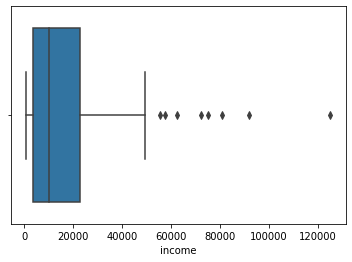

In [ ]:
# plotting is distplot to understand the variable 'income'

sns.boxplot(df['income'])
plt.show()

In [ ]:
# we notice some outiers

In [ ]:
# value at the 90th percentile

income_q = df.income.quantile(0.9)

The higher values of net income in a country does not add value to our problem statement. Those countries will not fall in the category of countries we can recommend the CEO to focus on.

In [ ]:
# capping the at outliers at 90th percentile

df.income[df.income > 42000] = income_q

In [ ]:
# checking the new details of the variable

df.income.describe()

count      167.000000
mean     15217.263473
std      13726.451022
min        609.000000
25%       3355.000000
50%       9960.000000
75%      22800.000000
max      41400.000000
Name: income, dtype: float64

#### Variable Three : gdpp

In [ ]:
# 'gdpp' expresses the GDP per capita in a specific country

In [ ]:
df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

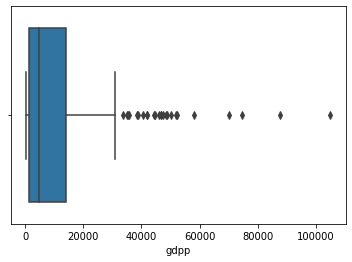

In [ ]:
# plotting is distplot to understand the variable 'gdpp'

sns.boxplot(df['gdpp'])
plt.show()

In [ ]:
# we notice some outliers

In [ ]:
# value at the 90th percentile

gdpp_q = df.gdpp.quantile(0.9)

Similar to net income, the higher values of GDP per capita in a country does not add value to our problem statement. Those countries will not fall in the category of countries we can recommend the CEO to focus on.

In [ ]:
# # capping the at outliers at 90th percentile

df.gdpp[df.gdpp > 27000] = gdpp_q

In [ ]:
# checking the new details of the variable

df.gdpp.describe()

count      167.000000
mean     11938.167665
std      14765.641532
min        231.000000
25%       1330.000000
50%       4660.000000
75%      14050.000000
max      41840.000000
Name: gdpp, dtype: float64

## 2. Hopkins Score

#### Checking the Hopkins Score

In [ ]:
# importing the relevant packages

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [ ]:

# Calculating the Hopkins score by using an external library

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
# creating a new dataframe with only the selected columns for clustering

df1 = df.drop(['country'], axis = 1)

In [ ]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Calcualting the hopkins score multiple times to check for the different values that the hopkins score might take

(for i in range (1,11):
    print(hopkins(df1)))

0.9364327025884164
0.9404123802485471
0.9396091673030446
0.9231867475814011
0.9395231282054961
0.9178053259692266
0.8695554556533871
0.9125676881286339
0.8718996001684429
0.9264353332712969


The Hopkins score is greater that 80 percentage even after runining it more than 10 times. So we can understand that the data has good clustering tendency

## 3. Scaling

In [ ]:
# importing relevant library

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

df2 = scaler.fit_transform(df1)


df2 = pd.DataFrame(df2, columns = df1.columns[:])

df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.994298,0.157336,-1.619092,1.902882,-0.773377
1,-0.538949,-0.479658,-0.097016,0.070837,-0.386346,-0.312347,0.647866,-0.859973,-0.533114
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.169325,0.789274,0.670423,-0.038404,-0.507981
3,2.007808,0.775381,-1.448071,-0.165315,-0.680823,1.387054,-1.179234,2.128151,-0.571154
4,-0.695634,0.160668,-0.286894,0.497568,0.283716,-0.601749,0.704258,-0.541946,0.017786


## 4. K Means CLustering

#### Choosing the value of K with Silhouttee Score

In [ ]:
# importing revelant libraries

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

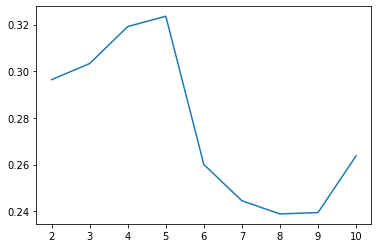

In [ ]:
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmean.labels_)])

temp = pd.DataFrame(ss)
plt.plot(temp[0], temp[1])
plt.show()

#### Note :
1. Though the peak value of silhouttee score is in between 3 and 4
2. We will check the Elbow curve before making a conclusion on the number of clusters

#### Choosing the value of K with Elbow curve

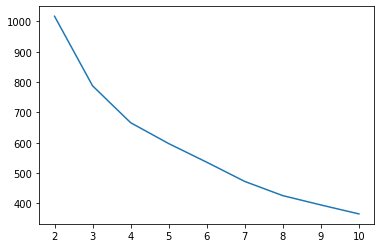

In [ ]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])

temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

Note:
1. In this curve we have a break point at 3,4 and 6
2. In elbow curve we prefer choosing the lesser clusters in case of multiple bends

Note:

We choose the value of 3 and 4 based on both the plots

### 4A. Clustering : Creating 3 different clusters

In [ ]:
# creating 3 different clusters

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# creating the dataframe from the output we got from K Mean algorithm

cluster_3  = pd.DataFrame(kmean.labels_, columns= ['cluster_3'])
cluster_3.head()

,cluster_3
0,2
1,1
2,1
3,2
4,1


In [ ]:
# concatinating the dataframe :  clusters_1 and kmean

df_kmean = pd.concat([df, cluster_3], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
# checking the value counts in each cluster

df_kmean.cluster_3.value_counts()

1    83
2    45
0    39
Name: cluster_3, dtype: int64

### 4B. Cluster Profiling based on K Means Clustering , k=3

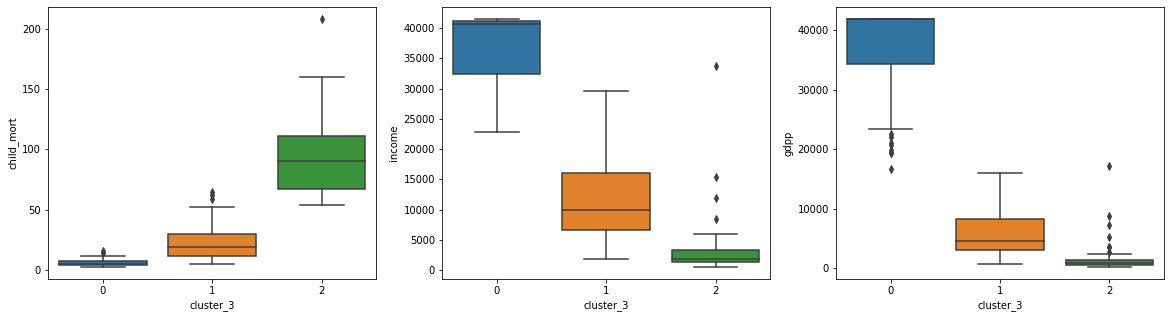

In [ ]:
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
sns.boxplot(x= 'cluster_3', y ='child_mort', data = df_kmean)

plt.subplot(1,3,2)
sns.boxplot(x= 'cluster_3', y ='income', data = df_kmean)

plt.subplot(1,3,3)
sns.boxplot(x= 'cluster_3', y ='gdpp', data = df_kmean)

plt.show()

#### Properties of Different Clusters

1. Cluster 2 has very high child mortality, low net income per person and very low GDP per capita
2. Cluster 1 has medium range child mortality , medium range net income per person and low GDP per capita
3. Cluster 0 has low child mortality , high net income per person and high GDP per capita

In [ ]:
# Note : The cluster of our interest is cluster 2

### 4C. Focus Countries based on K Mean Clustering , k=3

In [ ]:
df_kmean[df_kmean['cluster_3'] == 2].shape

(45, 11)

In [ ]:
# We have 46 countries that fall in this category

In [ ]:
# countries that fall into this category

df_kmean[df_kmean['cluster_3'] == 2].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112     

In [ ]:
# sorting the countries to find the top 5 countries to focus on

df_kmean[df_kmean['cluster_3'] == 2].sort_values(by = ['child_mort','income','gdpp'] , ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2


#### The countries we can recommend the CEO to focus on based on K Means clustering as k = 3 are

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

### 4D. Creating 4 different clusters

In [ ]:
# creating 4 different clusters

kmean = KMeans(n_clusters = 4, random_state = 100)
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# creating the dataframe from the output we got from K Mean algorithm

cluster_4  = pd.DataFrame(kmean.labels_, columns= ['cluster_4'])
cluster_4.head()

,cluster_4
0,2
1,0
2,0
3,2
4,0


In [ ]:
# concatinating the dataframe :  clusters and kmean

df_kmean = pd.concat([df_kmean, cluster_4], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [ ]:
# checking the value counts in each cluster

df_kmean.cluster_4.value_counts()

0    83
2    45
1    36
3     3
Name: cluster_4, dtype: int64

### 4E. Cluster Profiling based on K Means Clustering, k=4

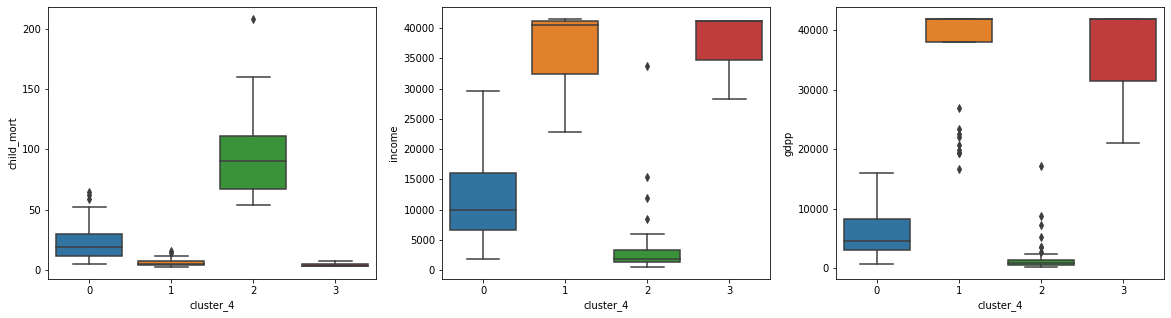

In [ ]:
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
sns.boxplot(x= 'cluster_4', y ='child_mort', data = df_kmean)

plt.subplot(1,3,2)
sns.boxplot(x= 'cluster_4', y ='income', data = df_kmean)

plt.subplot(1,3,3)
sns.boxplot(x= 'cluster_4', y ='gdpp', data = df_kmean)

plt.show()

1. Cluster 0 has low child mortality, low net income per person and low GDP per capita
2. Cluster 1 has low range child mortality , high net income per person and high GDP per capita
3. Cluster 2 has high child mortality , very low net income per person and very low GDP per capita
4. Cluster 3 has low child mortality , high net income per person and high GDP per capita

In [ ]:
# Note : cluster of interest is cluster 2

### 4F. Focus Countries based on K Mean Clustering , k=4

In [ ]:
df_kmean[df_kmean['cluster_4'] == 2].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112     

In [ ]:
# sorting the countries to find the top 5 countries to focus on

df_kmean[df_kmean['cluster_4'] == 2].sort_values(by = ['child_mort','income','gdpp'] , ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2,2


#### The countries we can recommend the CEO to focus on based on K Means clustering as k = 4 are

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

#### Note

We used the scaled dataframe with all the continuous columns in case of K means clustering because it was giving decent clusters. We have not done the same with Hierarchical Clustering as proper clusters were not forming. We have only used the selected variables for Hierarchical Clustering.

## 5. Hierarchical Clustering

In [ ]:
# importing relevant libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# checking the scaled dataframe : This is the same dataframe we used in the K Means clustering

df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.994298,0.157336,-1.619092,1.902882,-0.773377
1,-0.538949,-0.479658,-0.097016,0.070837,-0.386346,-0.312347,0.647866,-0.859973,-0.533114
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.169325,0.789274,0.670423,-0.038404,-0.507981
3,2.007808,0.775381,-1.448071,-0.165315,-0.680823,1.387054,-1.179234,2.128151,-0.571154
4,-0.695634,0.160668,-0.286894,0.497568,0.283716,-0.601749,0.704258,-0.541946,0.017786


In [ ]:
#getting the dataframe with the countries and the clusters derived from K Means Clustering

df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [ ]:
# creating a new dataframe df_h for hierarchial clustering

df_h = df2.drop(['exports','health','imports','inflation','life_expec','total_fer'] , axis =1)

In [ ]:
# Observing the new dataframe

df_h.head()

,child_mort,income,gdpp
0,1.291532,-0.994298,-0.773377
1,-0.538949,-0.386346,-0.533114
2,-0.272833,-0.169325,-0.507981
3,2.007808,-0.680823,-0.571154
4,-0.695634,0.283716,0.017786


#### Single Linkage

In [ ]:
# Checking the clustering based on single linkage

output = linkage(df_h, method ='single',metric = 'euclidean')

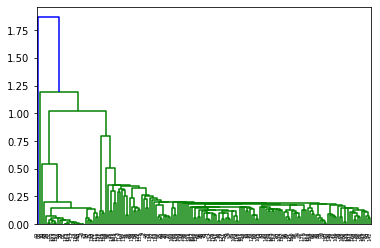

In [ ]:
dendrogram(output)
plt.show()

1. It is very difficult to read the results based on single linkage
2. The formation of clusters do not seem to be appropriate

#### Complete linkage

In [ ]:
output = linkage(df_h, method ='complete',metric = 'euclidean')

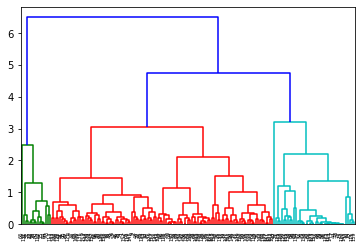

In [ ]:
dendrogram(output)
plt.show()

1. It is easier to read the result based on complete linkage
2. The formation of clusters seem appropriate

#### Choosing the number of clusters

In [ ]:
# We are choosing to create 3 clusters based in reference to the above dendrogram

cut_tree(output, n_clusters = 3).shape

(167, 1)

In [ ]:
# creating the array clusters_h

clusters_h = cut_tree(output, n_clusters = 3).reshape(-1,)

In [ ]:
# Assigning a new column - 'clusters_h' to the df_kmean dataframe

df_kmean['clusters_h']= clusters_h

In [ ]:
# Obaserivng the df_kmean dataframe

df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4,clusters_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0


#### Ploting the clusters

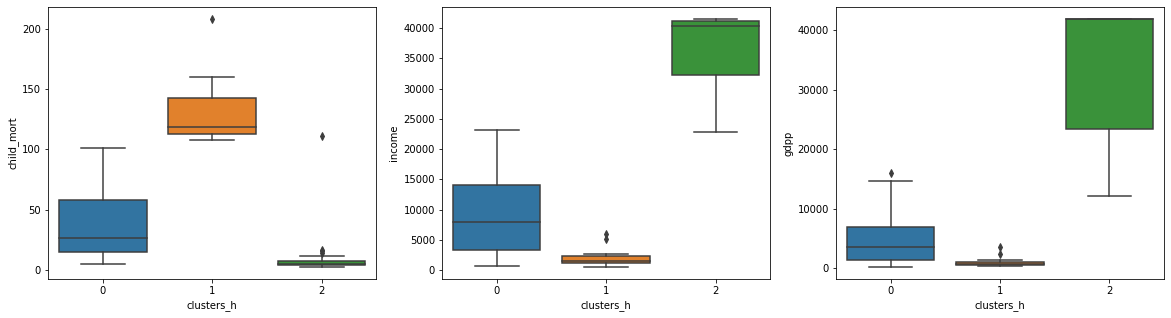

In [ ]:
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
sns.boxplot(x= 'clusters_h', y ='child_mort', data = df_kmean)

plt.subplot(1,3,2)
sns.boxplot(x= 'clusters_h', y ='income', data = df_kmean)

plt.subplot(1,3,3)
sns.boxplot(x= 'clusters_h', y ='gdpp', data = df_kmean)

plt.show()

1. Cluster 0 has medium range child mortality , medium range net income per person and medium GDP per capita
2. Cluster 1 has very high child mortality, very low net income per person and very low GDP per capita
3. Cluster 2 has low child mortality , high net income per person and high GDP per capita

In [ ]:
# Note : The cluster of our interest is cluster 1

In [ ]:
# checking the countries in cluster 1

df_kmean[df_kmean['clusters_h'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4,clusters_h
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,2,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2,2,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,2,2,1
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,2,2,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,2,2,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,2,2,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,2,2,1
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,2,2,1
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,2,2,1
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,2,2,1


In [ ]:
# sorting the countries to find the top 5 countries to focus on

df_kmean[df_kmean['clusters_h'] == 1].sort_values(by = ['child_mort','income','gdpp'] , ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_3,cluster_4,clusters_h
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2,2,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2,2,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2,2,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2,2,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2,2,1


#### The countries we can recommend the CEO to focus on based on Hierarchial clustering are

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

## 6. Final Recommendation

We found the same focus countries based on both K Means clutsering and Hierarchial Clustering.

#### The focus countires

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali